Start in x0 = 2.5:
Finds x_max = 2.677945 in 3 iterations
f(x_max) = 2.236068
------------------
Start in x0 = 3:
Finds x_max = 2.677945 in 3 iterations
f(x_max) = 2.236068
------------------
x_min = 1
f(x_min) = -0.2391336269283828


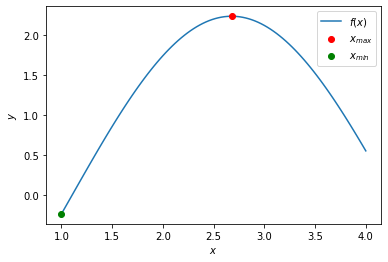

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) - 2*np.cos(x)

def df(f, x, h=1e-4):
    return (f(x + h) - f(x - h))/2/h

def d2f(f, x, h=1e-4):
    return (f(x + 2 * h)- 2 * f(x) + f(x-2* h))/(4*h*h)

def newtons_step(f, x):
    return x - df(f, x)/d2f(f, x)

def p(x2, x1, x0):
    x2_x1 = np.abs(x2 - x1)
    x1_x0 = np.abs(x1 - x0)
    return np.abs(x2_x1 / (1 - x2_x1/ x1_x0))

def newtons_method(f, x0, eps=1e-6):
    x1 = newtons_step(f, x0)
    x2 = newtons_step(f, x1)
    i = 2
    while p(x2, x1, x0) > eps:
        x0 = x1
        x1 = x2
        x2 = newtons_step(f, x2)
        i += 1
    return x2, i

a = 1
b = 4
x_points = np.linspace(a, b, 100)
x1, i1 = newtons_method(f, 2.5)
x2, i2 = newtons_method(f,  3)
print(f'Start in x0 = {2.5}:\nFinds x_max = {x1:.6f} in {i1} iterations')
print(f'f(x_max) = {f(x1):.6f}')
print('------------------')
print(f'Start in x0 = {3}:\nFinds x_max = {x2:.6f} in {i2} iterations')
print(f'f(x_max) = {f(x2):.6f}')
print('------------------')
x_min = [a, b][np.argmin([f(a), f(b)])]
print(f'x_min = {x_min}')
print(f'f(x_min) = {f(x_min)}')
plt.plot(x_points, f(x_points), label="$f(x)$")
plt.scatter(x1, f(x1), label="$x_{max}$", c="r", zorder=10)
plt.scatter(x_min, f(x_min), label="$x_{min}$", c="g", zorder=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Accuracy achives with N = 30: 9.181433855343755e-07 < 1e-06
-----------------
t_min = 1.000000
x(t_min) = 0.268093
-----------------
t_max = 2.000000
x(t_max) = 1.009653


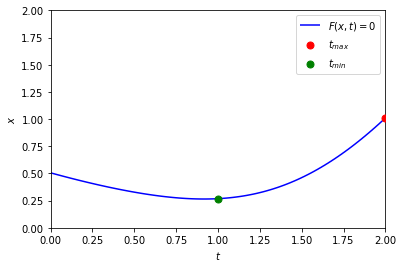

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def fibonacci(n):
    if n in (0, 1):
        return 1
    return fibonacci(n - 1) + fibonacci(n - 2)

def f(x, t):
    return np.exp(2*x+t) - np.exp(t**2) - 2*np.cos(x)

def x(t):
    return  fsolve(lambda x: f(x, t), 1)[0]

def fib_meth(f, a, b, n, eps=1e-6):
    x1, x2 = a + (b - a)*fibonacci(n-2)/fibonacci(n), a + (b - a)*fibonacci(n-1)/fibonacci(n)
    y1, y2 = f(x1), f(x2)
    for ind in range(1, n, -1):
        if y1 > y2:
            a = x1
            x1 = x2
            x2 = b - (x1 - a)
            y1 = y2
            y2 = f(x2)
        else:
            b = x2
            x2 = x1
            x1 = a + (b - x2)
            y2 = y1
            y1 = f(x1)
    return (x1 + x2)/2

t1, t2 =  0, 2
x1, x2 =  0, 2
t_points = np.linspace(t1, t2, 100)
x_points = np.linspace(x1, x2, 100)
X, T = np.meshgrid(x_points, t_points)
contour1 = plt.contour(T, X, f(X, T),[0], colors='b')
h1,_ = contour1.legend_elements()

eps = 10**(-6)
n = 0
while 2/fibonacci(n + 1) >= eps:
    n += 1
print(f'Accuracy achives with N = {n}: {2/fibonacci(31)} < {eps}')
print('-----------------')

t_min = fib_meth(x, t1, t2, n)
print(f"t_min = {t_min:.6f}")
print(f"x(t_min) = {x(t_min):.6f}")
print('-----------------')
t_max = [t1, t2][np.argmax([x(t1), x(t2)])]
print(f"t_max = {t_max:.6f}")
print(f"x(t_max) = {x(t_max):.6f}")
p1 = plt.scatter(t_max, x(t_max), c="r", s=49, zorder=10, label="$t_{max}$")
p2 = plt.scatter(t_min, x(t_min), c="g", s=49, zorder=10, label="$t_{min}$")
plt.legend([h1[0], p1, p2], ['$F(x,t)=0$', '$t_{max}$', "$t_{min}$"])
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.show()

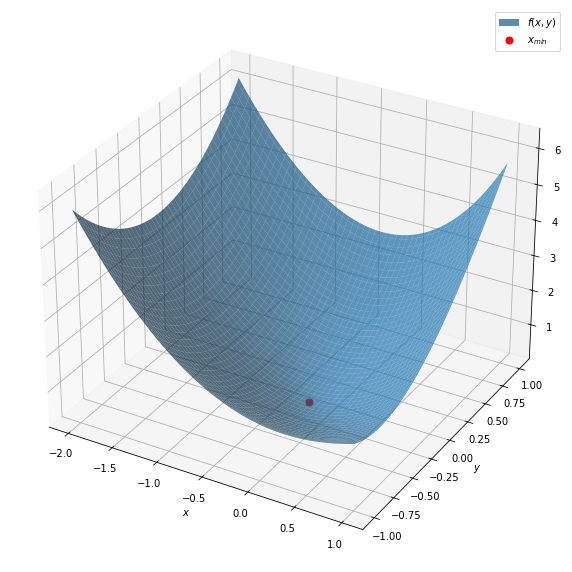

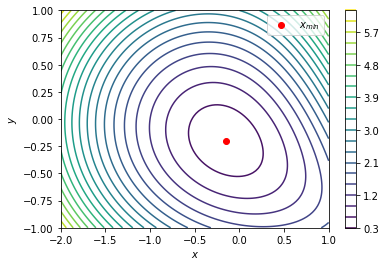

Start in x0 = [-1.5, -1]
Finds x_min = [-0.155335 -0.199443] in 6 iterations
f(x_min) = 0.414353
----------------
Start in x0 = [1, 1]
Finds x_min = [-0.155335 -0.199443] in 7 iterations
f(x_min) = 0.414353
----------------


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f(x):
    x, y = x
    return  x ** 2 + 2 * (y**2) + np.exp(x) * np.cos(y-1)
x1, x2 = -2, 1
y1, y2 = -1, 1

x_points = np.linspace(x1, x2, 100)
y_points = np.linspace(y1, y2, 100)
r1 = minimize(f, [-1.5, -1], tol=1e-6)
r2 = minimize(f, [1, 1], tol=1e-6)
X, Y = np.meshgrid(x_points, y_points)
fig = plt.figure(figsize=(10, 18))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.plot_surface(X, Y, f([X,Y]), alpha=0.7, label="$f(x, y)$")
ax_3d.scatter(*r1.x, r1.fun, s=49, c="r", alpha=1, label="$x_{min}$")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")
plt.legend()
plt.show()
plt.contour(X, Y, f([X, Y]), 20)
plt.colorbar()
plt.scatter(*r1.x, c="r", label="$x_{min}$", zorder=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()
with np.printoptions(6):
    print("Start in x0 = [-1.5, -1]")
    print(f"Finds x_min = {r1.x} in {r1.nit} iterations")
    print(f"f(x_min) = {r1.fun:.6f}")
    print('----------------')
    print("Start in x0 = [1, 1]")
    print(f"Finds x_min = {r2.x} in {r2.nit} iterations")
    print(f"f(x_min) = {r1.fun:.6f}")
    print('----------------')

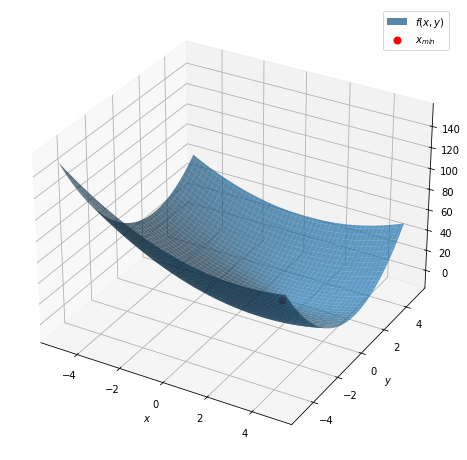

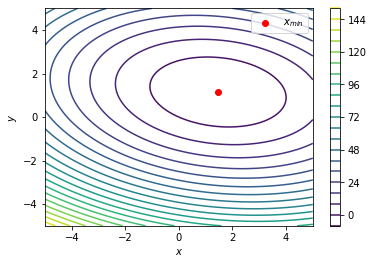

Start in x0 = [1.5, -3]
Finds x_min = [1.461538 1.153846] in 2 iterations
f(x_min) = -6.307692
----------------
Start in x0 = [-40, 60]
Finds x_min = [1.461538 1.153846] in 2 iterations
f(x_min) = -6.307692
----------------


In [4]:
import numpy as np
import matplotlib.pyplot as plt

a11 = 1 
a12 = 0.5 
a22 = 2.5 
a13 = -3.5 
a23 = -6.5
def f(x):
    x, y = x
    return (
        a11 * x**2 + a12 * x * y + a22 * y**2 + a13 * x + a23 * y
    )

def grad(f, x, h = 1e-4):
    x, y = x
    return np.array(
        [
            (f([x + h, y]) - f([x - h, y]))/ h / 2,
            (f([x, y + h]) - f([x, y - h]))/ h / 2
        ]
    )
def df(f, x, h=1e-4):
    return (f(x + h) - f(x - h))/2/h

def d2f(f, x, h=1e-4):
    return (f(x + 2 * h)- 2 * f(x) + f(x-2* h))/(4*h*h)

def newtons_step(f, x):
    return x - df(f, x)/d2f(f, x)

def p(x2, x1, x0):
    x2_x1 = np.abs(x2 - x1)
    x1_x0 = np.abs(x1 - x0)
    return np.abs(x2_x1 / (1 - x2_x1/ x1_x0))

def newtons_method(f, x0 = 1.0, eps = 1e-6):
    x1 = newtons_step(f, x0)
    x2 = newtons_step(f, x1)
    while p(x2, x1, x0)>eps:
        x0 = x1
        x1 = x2
        x2 = newtons_step(f, x2)
    return x2
    
    
def congruent_gradients(f, x0, eps=1e-6):
    s = -grad(f, x0)
    prev_grad = s
    x = x0.copy()
    i = 0
    while np.max(np.abs(-grad(f, x))) > eps:
        i += 1
        def foo(a):
            return f(x + a * s)
        a = newtons_method(foo)
        x += a * s
        new_grad = -grad(f, x)
        s = new_grad + np.sum(new_grad **2)/np.sum(prev_grad ** 2) * s
        prev_grad = new_grad
    return x, i


x_points = np.linspace(-5, 5, 100)
y_points = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_points, y_points)
fig = plt.figure(figsize=(8, 16))
ax_3d = fig.add_subplot(projection='3d')
x01 = np.array([1.5, -3.0])
x02 = np.array([-40.0, 60.0])
x_min1, iter1 = congruent_gradients(f, x01)
x_min2, iter2 = congruent_gradients(f, x02)
ax_3d.plot_surface(X, Y, f([X,Y]), alpha=0.7, label="$f(x,y)$")
ax_3d.scatter(*x_min1, f(x_min1), s=49, c="r", alpha=1, label="$x_{min}$")
ax_3d.set_xlabel("$x$")
ax_3d.set_ylabel("$y$")
ax_3d.set_zlabel("$z$")
ax_3d.legend()
plt.show()
plt.contour(X, Y, f([X, Y]), 20)
plt.colorbar()
plt.scatter(*x_min1, c="r", label="$x_{min}$", zorder=10)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()
with np.printoptions(6):
    print("Start in x0 = [1.5, -3]")
    print(f"Finds x_min = {x_min1} in {iter1} iterations")
    print(f"f(x_min) = {f(x_min1):.6f}")
    print('----------------')
    print("Start in x0 = [-40, 60]")
    print(f"Finds x_min = {x_min2} in {iter2} iterations")
    print(f"f(x_min) = {f(x_min2):.6f}")
    print('----------------')